# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final asnwers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from (insidearibnb.com)[http://insideairbnb.com/get-the-data.html]. You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 43763**
2. **Number of unique hosts = 26730**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**


There are 43763 unique listings in the LA dataset, and there are 26730 unique hosts

In [39]:
import pandas as pd
import numpy as np

In [40]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)

df = pd.read_csv("./listing_data/listings.csv")
# listing.csv is under the listing_data folder, 
# while this python notebook file is stored within the same directory as the listing_data folder

df["id"].nunique(),df["host_id"].nunique()
df.loc[df['host_id']==11619,['id','host_listings_count','host_total_listings_count','calculated_host_listings_count']]

,id,host_listings_count,host_total_listings_count,calculated_host_listings_count
10,6033,12.0,12.0,5
123,84789,12.0,12.0,5
994,724996,12.0,12.0,5
1955,1508237,12.0,12.0,5
9390,9148791,12.0,12.0,5


### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

(You need to write your answer in this markdown cell)

In [137]:
# You need to provide the code to answer the previous quesiton
df1 = df.groupby(by=["host_id"]).apply(lambda x:pd.Series({"listing_per_host":x["id"].count()})).reset_index()
mean= df1.listing_per_host.mean()
median= df1.listing_per_host.median()
std= df1.listing_per_host.std()
max_df1=df1.listing_per_host.max()
min_df1=df1.listing_per_host.min()

In [138]:
mean,median,std,max_df1,min_df1

(1.6372240927796484, 1.0, 2.4972817129321685, 152, 1)

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

(You need to write your answer in this markdown cell)

In [59]:
# You need to provide the code to answer the previous quesiton
df3 = df.drop_duplicates(keep="first",subset=["host_id"]).\
      groupby(by=["host_is_superhost"])["calculated_host_listings_count"].agg([np.mean,np.std])
df3

,mean,std
host_is_superhost,,
f,1.603263,2.646289
t,1.753056,1.902281


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

(You need to write your answer in this markdown cell)

In [5]:
# You need to provide the code to answer the previous quesiton
type_list=[]
for row in df.host_verifications.values.tolist():
    normal = row.strip("[]").replace("'","").split(", ")
    for value_type in normal:
        if value_type not in type_list:
            type_list.append(value_type)
type_list,len(type_list)

(['email',
  'phone',
  'facebook',
  'reviews',
  'kba',
  'jumio',
  'government_id',
  'offline_government_id',
  'selfie',
  'identity_manual',
  'work_email',
  'google',
  'manual_online',
  'manual_offline',
  '',
  'sent_id',
  'sesame',
  'sesame_offline',
  'None',
  'photographer',
  'zhima_selfie',
  'weibo'],
 22)

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

(You need to write your answer in this markdown cell)

In [76]:
# You need to provide the code to answer the previous quesiton
#df.loc[:, ['host_id','host_verifications']].groupby(by="host_id")["host_verifications"].value_counts()
df5 = df.drop_duplicates(keep ="first",subset=["host_id"]).loc[:,["host_id","host_verifications"]]

type_dict={}

for index,row in df5.iterrows():
    j = row['host_verifications'].strip('[]').replace("'","").split(', ')
    for t in j:
        if t not in type_dict:
            type_dict[t]=1
        else:
            type_dict[t]+=1
five_popular = sorted(type_dict.items(),key = lambda x:x[1],reverse = True)[:6]
five_popular

total_id = len(df5.host_id)
five_perc={}
for i in range(len(five_popular)):
    five_perc[five_popular[i][0]] = five_popular[i][1]/total_id 

five_perc


{'phone': 0.9937523381967827,
 'email': 0.9353909465020576,
 'reviews': 0.7422745978301534,
 'government_id': 0.464983164983165,
 'jumio': 0.45173961840628507,
 'kba': 0.2632248410026188}

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2019 to 03/01/2019 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

(You need to write your answer in this markdown cell)

In [57]:
df_calendar = pd.read_csv("./calendar/calendar.csv",parse_dates=["date"])
calendar = df_calendar.loc[(df_calendar.date >= "2019-1-1") & (df_calendar.date <= "2019-3-1") & (df_calendar.available == "t")].\
drop_duplicates(keep = "first")
calendar["price"] = calendar["price"].apply(lambda x:float(x.replace("$","").replace(",","")))
mean_of_aveprice = calendar.groupby("listing_id")["price"].mean().mean()
std_of_aveprice = calendar.groupby("listing_id")["price"].mean().std()
mean_of_aveprice,std_of_aveprice

(213.2409167657559, 577.3961352033027)

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

(You need to write your answer in this markdown cell)

In [27]:
# You need to provide the code to answer the previous quesiton
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2019-01-01 to 2019-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

(You need to write your answer in this markdown cell)

In [113]:
# You need to provide the code to answer the previous quesiton
df_calendar8 = df_calendar.loc[(df_calendar.date >= "2019-1-1") & (df_calendar.date <= "2019-2-1"),:]
df_listing =df.loc[:,["id","zipcode","host_id"]]
df_join = df_calendar8.merge(df_listing, how="inner", left_on ="listing_id",right_on ="id")
df_join["available"] = df_join["available"].apply(lambda x: True if x =="t" else False)
df_join["price"] = df_join["price"].apply(lambda x: float(str(x).replace("$","").replace(",","")))
df_true=df_join.loc[df_join["available"]== True,:]
df8 = df_true.groupby("zipcode").filter(lambda x: len(x)>=30)
zipcodeseries=df8.groupby(by=["zipcode"]).price.mean().sort_values(ascending=False).head(5)
print(zipcodeseries)




zipcode
90210    1440.587339
37738    1178.687500
90265    1119.410276
90069     776.265778
90077     740.833933
Name: price, dtype: float64


(43712, 1141)

In [127]:
fivezipcode = list(zipcodeseries.index)
df_five=df_join.loc[df_join["zipcode"].isin(fivezipcode),:]
def fuck(wtf):
    num_of_host=wtf["host_id"].nunique()
    listing_a=wtf.groupby(by=["listing_id"]).available.sum().reset_index()
    listing_a["available"]=listing_a.available.apply(lambda x:1 if x!=0 else 0)
    num_of_active_listing = listing_a["available"].sum()
    return pd.Series({"num_of_host":num_of_host,"num_of_active_listing":num_of_active_listing})
result=df_five.groupby("zipcode").apply(fuck)
result

,num_of_host,num_of_active_listing
zipcode,,
37738,1,1
90069,508,529
90077,66,66
90210,257,297
90265,379,473


In [126]:

result=df_five.groupby("zipcode").apply(lambda x:pd.Series({"num_of_host":x["host_id"].nunique(),\
                                                            "num_of_active_listing":x["available"].sum()}))
result

,num_of_host,num_of_active_listing
zipcode,,
37738,1,32
90069,508,12834
90077,66,1668
90210,257,7614
90265,379,11502


In [114]:
df_five.head()

,listing_id,date,available,price,id,zipcode,host_id
1504,33447,2019-02-01,True,185.0,33447,90265,144837
1505,33447,2019-01-31,True,185.0,33447,90265,144837
1506,33447,2019-01-30,True,185.0,33447,90265,144837
1507,33447,2019-01-29,True,185.0,33447,90265,144837
1508,33447,2019-01-28,True,185.0,33447,90265,144837


### Question 9: Focusing on the data from 2019-01-01 to 2019-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

(You need to write your answer in this markdown cell)

In [9]:
# You need to provide the code to answer the previous quesiton



### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2019-01-01 to 2019-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2019-01-01 to 2019-04-01?
**Question 10 Answer:** 
(You need to write your answer in this markdown cell)

In [35]:
# You need to provide the code to answer the previous quesiton
df_beds=df.loc[:,["id","beds","host_id"]]
df_10 = df_calendar.loc[(df_calendar.date >= "2019-1-1") & (df_calendar.date <= "2019-4-1"),:]
df_bedjoin = df_10.merge(df_beds, how="inner", left_on ="listing_id",right_on ="id")
df_bedjoin["available"] = df_bedjoin["available"].apply(lambda x: True if x =="t" else False)
df_bedjoin["price"] = df_bedjoin["price"].apply(lambda x: float(str(x).replace("$","").replace(",","")))
daily_capacity=df_bedjoin.groupby("date").apply(lambda x:pd.Series({"daily_total_capacity":(x["available"]*x["beds"]).sum()}))
df_daily_money =df_bedjoin.groupby("date").apply(lambda x:x["price"].sum()/((x["available"]*x["beds"]).sum()))
df_daily_money.mean(),df_daily_money.std(),daily_capacity.mean(),daily_capacity.std()

(106.00370710110897, 2.589224898513359, daily_total_capacity    51105.835165
 dtype: float64, daily_total_capacity    1387.175342
 dtype: float64)

In [217]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** How is the distribution for the review scores values for every host from 2018/12/01 to 2018/12/31

**Question 2:** 

**Question 3:**

**Question 4:**

**Question 5:**


In [51]:
# Your code to answer Question 1
import matplotlib.pyplot as plt
avg_review_value=df.review_scores_value.mean()
avg_review_per_host = df.groupby("host_id").review_scores_value.mean().reset_index()
good_host = avg_review_per_host.loc[avg_review_per_host["review_scores_value"]>= avg_review_value,:]
good_hostlist=good_host["host_id"].values.tolist()
# good_host["review_scores_value"].plot(kind="hist",bins=5,x = "review_values",y = "counts_good_hosts")
hostlisting=df.loc[:,["host_id","id","city"]]
most_available_ten_cities = ["Los Angeles","Long Beach","West Hollywood","Santa Monica","Pasadena",\
                     "Beverly Hills","Malibu","Glendale","Burbank","Redondo Beach"]
df_nextmonth = df_calendar.loc[(df_calendar.date >= "2018-12-1")&(df_calendar.date <= "2018-12-31")&(df_calendar.available == "t"),:]
nextavailable=df_nextmonth.merge(hostlisting,how="inner",left_on="listing_id",right_on="id")
nextavailable["price"] = nextavailable["price"].apply(lambda x: float(str(x).replace("$","").replace(",","")))
good_available=nextavailable.loc[nextavailable["host_id"].isin(good_hostlist),:]
top_available=good_available.loc[good_available["city"].isin(most_available_ten_cities),:]

['Los Angeles',
 'Long Beach',
 'West Hollywood',
 'Santa Monica',
 'Beverly Hills',
 'Marina del Rey',
 'Pasadena',
 'Malibu',
 'Glendale',
 'Rowland Heights']

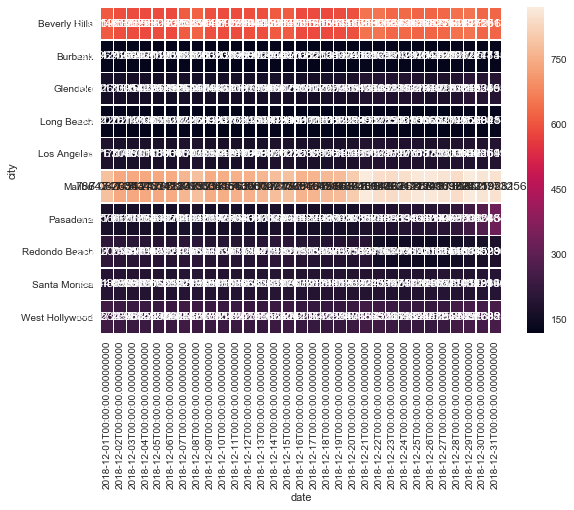

In [81]:
import seaborn as sns
# fig1, ax1 = plt.subplots(figsize=(20,4))
# ax1.set_title('Price Boxplot of Top ten cities')
# sns.boxplot(x="city", y="price", data=top_available,
#             whis="range", palette="vlag",sym=None)
# ax1.set_ylim([0,1000])
sns.set()

heats = top.pivot("city", "date", "price")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heats, annot=True, fmt="f", linewidths=.5, ax=ax)
Question 5: What is price distribution for the the top 10 most available city from 2018/12/01 to 2018/12/31

In [53]:
# def priceclass(value):
#     listclass=""
#     if value <=100:
#         listclass ="Low Price"
#     elif value <= 200:
#         listclass="Economy"
#     elif value <= 600:
#         listclass="Economy Premium"
#     elif value <= 1200:
#         listclass="Premium"
#     elif value >= 1500:
#         listclass="Royal"
#     return listclass
# good_available["price_class"]=good_available.price.apply(priceclass)


Text(0.5,1,'Which neighbourhood do the good-reviewed hosts belong to')

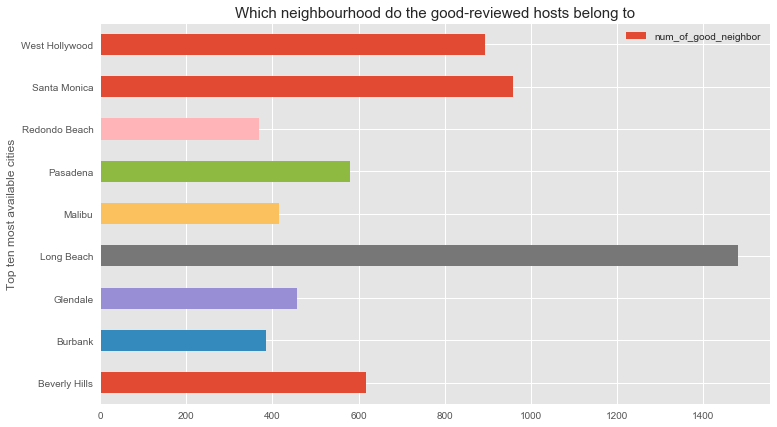

In [112]:
good_host_neighbour=df.loc[df["neighbourhood_cleansed"].isin(most_available_ten_cities),["host_id","neighbourhood_cleansed"]]
good_neighbor=good_host_neighbour.groupby("neighbourhood_cleansed").host_id.count().reset_index()
good_neighbor=good_neighbor.rename(columns={"host_id":"num_of_good_neighbor"})
plt.style.use("ggplot")
fig_nei,ax_nei=plt.subplots(figsize=(12,7))
good_neighbor.plot(kind="barh",x="neighbourhood_cleansed",y="num_of_good_neighbor",ax=ax_nei)
ax_nei.set_ylabel("Top ten most available cities")
ax_nei.set_title("Which neighbourhood do the good-reviewed hosts belong to?",fontsize=15)

In [44]:
# Your code to answer Question 2
len(good_hostlist)

14381

In [ ]:
# Your code to answer Question 3

In [ ]:
# Your code to answer Question 4

In [ ]:
# Your code to answer Question 5

## Executive Summary
**(You need to use this cell to write your executive summary)**
